## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

import os

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# from dtreeviz.trees import *
import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed

## Importação da base de dados

In [2]:
df = pd.read_csv('/home/lucasmateus/dbt-projects/projetos_lucas/preditiva/arvores_decisao/base_rh.csv')

In [3]:
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [4]:
# Define a dictionary for mapping values
replacements = {'Sim': 1, 'Não': 0}

# Replace values in the 'Funcionario_Deixou_Empresa' column using the dictionary
df['Funcionario_Deixou_Empresa_encoded'] = df['Funcionario_Deixou_Empresa'].replace(replacements)

## Preparação dos Dados

### Missing Values

In [5]:
df.isnull().mean()

Funcionario_Deixou_Empresa            0.0
Freq_Viagens                          0.0
Formacao                              0.0
Estado_Civil                          0.0
Faz_hora_extras                       0.0
Equilibrio_de_Vida                    0.0
Idade                                 0.0
Tempo_de_empresa                      0.0
Funcionario_Deixou_Empresa_encoded    0.0
dtype: float64

### Duplicações

In [6]:
df.duplicated().sum()

33

In [7]:
# df.loc[df.duplicated()]
# validar duplicatas com especialistas de negócios

### Tipos de Variáveis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Funcionario_Deixou_Empresa          1470 non-null   object
 1   Freq_Viagens                        1470 non-null   object
 2   Formacao                            1470 non-null   object
 3   Estado_Civil                        1470 non-null   object
 4   Faz_hora_extras                     1470 non-null   object
 5   Equilibrio_de_Vida                  1470 non-null   object
 6   Idade                               1470 non-null   int64 
 7   Tempo_de_empresa                    1470 non-null   int64 
 8   Funcionario_Deixou_Empresa_encoded  1470 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 103.5+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

/home/lucasmateus/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


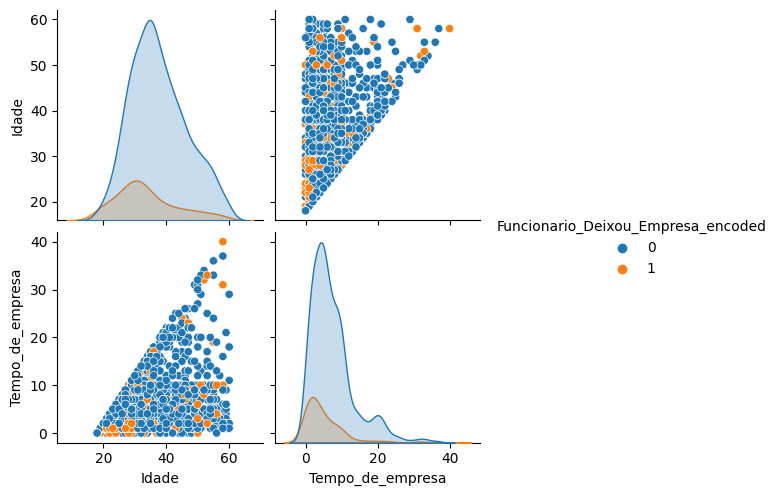

In [9]:
# plotando pairplot
sns.pairplot(df, hue='Funcionario_Deixou_Empresa_encoded')

### Information Value - IV

In [10]:
df_iv = aed.analise_iv(df, 
                          'Funcionario_Deixou_Empresa_encoded',
                            nbins=5)
df_iv.get_lista_iv()

/home/lucasmateus/dbt-projects/projetos_lucas/preditiva/arvores_decisao/aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Funcionario_Deixou_Empresa_encoded,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.31
Idade,0.26
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


In [41]:
df_iv.get_bivariada(var_escolhida='Faz_hora_extras')

==> "Faz_hora_extras" tem IV de 0.4


Funcionario_Deixou_Empresa_encoded,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Faz_hora_extras,Não,110.0,944.0,1054.0,71.7,46.41,76.56,10.44,0.61,-0.49,0.15
1,Faz_hora_extras,Sim,127.0,289.0,416.0,28.3,53.59,23.44,30.53,2.29,0.83,0.25


In [42]:
df_iv.get_bivariada(var_escolhida='Tempo_de_empresa')

==> "Tempo_de_empresa" tem IV de 0.31


Funcionario_Deixou_Empresa_encoded,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tempo_de_empresa,"(-0.01, 2.0]",102.0,240.0,342.0,23.27,43.04,19.46,29.82,2.21,0.79,0.19
1,Tempo_de_empresa,"(2.0, 5.0]",60.0,374.0,434.0,29.52,25.32,30.33,13.82,0.83,-0.19,0.01
2,Tempo_de_empresa,"(5.0, 7.0]",20.0,146.0,166.0,11.29,8.44,11.84,12.05,0.71,-0.34,0.01
3,Tempo_de_empresa,"(7.0, 10.0]",35.0,247.0,282.0,19.18,14.77,20.03,12.41,0.74,-0.30,0.02
4,Tempo_de_empresa,"(10.0, 40.0]",20.0,226.0,246.0,16.73,8.44,18.33,8.13,0.46,-0.78,0.08


### Relatórios Pandas Profiling e SweetViz

In [11]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df,
                                               target_feat='Funcionario_Deixou_Empresa_encoded')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão

### Tratamento das *Features* categóricas ordinais e não ordinais

In [12]:
# Defina as colunas para codificação
ordinal_cols = ['Freq_Viagens', 'Formacao', 'Equilibrio_de_Vida']

In [13]:
distinct_values = df['Equilibrio_de_Vida'].unique()

print(distinct_values)

['Ruim' 'Muito bom' 'Bom' 'Excelente']


In [14]:
# Define the ordinal encoding dictionary
ordinal_encoding = {
    'Freq_Viagens': {'Não viaja': 1, 'Viaja raramente': 2, 'Viaja frequentemente': 3},
    'Formacao': {'Ensino Médio': 1, 'Ensino Técnico': 2, 'Ensino Superior': 3, 'Mestrado': 4, 'Doutorado': 5},
    'Equilibrio_de_Vida': {'Ruim': 1, 'Bom': 2, 'Muito bom': 3, 'Excelente': 4}
}

# Encode the ordinal columns
df_encoded = df.copy()
for col, encoding in ordinal_encoding.items():
    df_encoded[col + '_encoded'] = df[col].replace(encoding)

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [17]:
categorical_data = df[['Estado_Civil', 'Faz_hora_extras']]
encoded_data = encoder.fit_transform(categorical_data)

In [18]:
# # Encode the categorical columns using get_dummies
# encoded_data = pd.get_dummies(categorical_data, drop_first=True)  # Recommended for decision trees

In [19]:
encoded_data

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [20]:
# Updated attribute name for newer scikit-learn versions
if hasattr(encoder, 'get_feature_names_out'):
    encoded_cols = encoder.get_feature_names_out(categorical_data.columns)
else:
    encoded_cols = np.array([f"{col}_category_{i}" for i, col in enumerate(categorical_data.columns) for feature in encoder.categories_[feature]])


In [21]:
df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_data, columns=encoded_cols)], axis=1)

In [22]:
df_encoded

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Funcionario_Deixou_Empresa_encoded,Freq_Viagens_encoded,Formacao_encoded,Equilibrio_de_Vida_encoded,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1,2,2,1,0.0,0.0,1.0,0.0,1.0
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0,3,1,3,1.0,0.0,0.0,1.0,0.0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1,2,2,3,0.0,0.0,1.0,0.0,1.0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0,3,4,3,1.0,0.0,0.0,0.0,1.0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0,2,1,3,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Não,Viaja frequentemente,Ensino Técnico,Casado,Não,Muito bom,36,5,0,3,2,3,1.0,0.0,0.0,1.0,0.0
1466,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,39,7,0,2,1,3,1.0,0.0,0.0,1.0,0.0
1467,Não,Viaja raramente,Ensino Superior,Casado,Sim,Muito bom,27,6,0,2,3,3,1.0,0.0,0.0,0.0,1.0
1468,Não,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,49,9,0,3,3,2,1.0,0.0,0.0,1.0,0.0


In [23]:
df_features = df_encoded[['Idade', 'Tempo_de_empresa', 'Funcionario_Deixou_Empresa_encoded',
                  'Freq_Viagens_encoded', 'Formacao_encoded', 'Equilibrio_de_Vida_encoded',
                  'Estado_Civil_Casado', 'Estado_Civil_Divorciado', 'Estado_Civil_Solteiro',
                  'Faz_hora_extras_Não', 'Faz_hora_extras_Sim']].astype(int)

In [24]:
df_features

,Idade,Tempo_de_empresa,Funcionario_Deixou_Empresa_encoded,Freq_Viagens_encoded,Formacao_encoded,Equilibrio_de_Vida_encoded,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim
0,41,6,1,2,2,1,0,0,1,0,1
1,49,10,0,3,1,3,1,0,0,1,0
2,37,0,1,2,2,3,0,0,1,0,1
3,33,8,0,3,4,3,1,0,0,0,1
4,27,2,0,2,1,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,36,5,0,3,2,3,1,0,0,1,0
1466,39,7,0,2,1,3,1,0,0,1,0
1467,27,6,0,2,3,3,1,0,0,0,1
1468,49,9,0,3,3,2,1,0,0,1,0


### Definição do *Target* e das *Features*

In [25]:
# definição do target
y = df_features['Funcionario_Deixou_Empresa_encoded']

# definição das features
x = df_features.drop('Funcionario_Deixou_Empresa_encoded', axis=1)

### Treinamento da Árvore de Decisão

In [26]:
emp_model = DecisionTreeClassifier(random_state=42, max_depth=3)
emp_model.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Text(0.5, 1.0, 'Classificação de Funcionários\n Utilizando Árvores de Decisão')

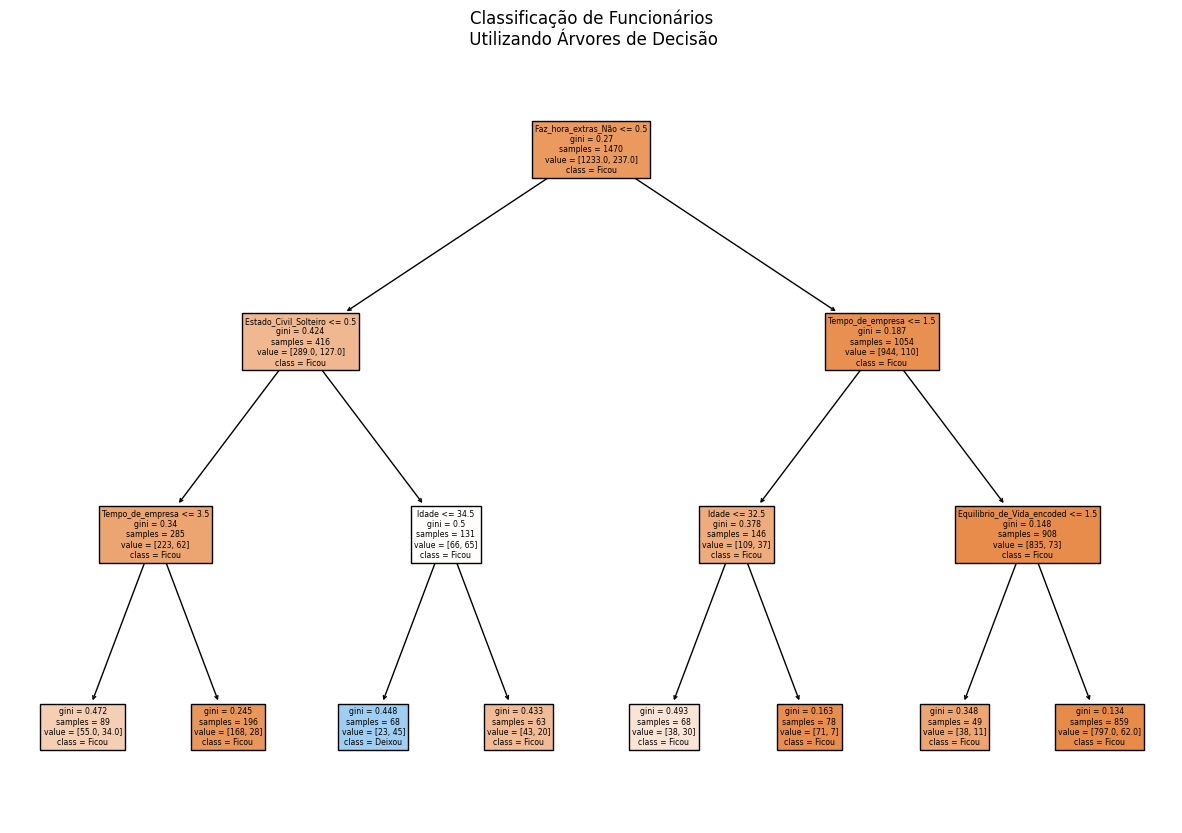

In [27]:
sns.reset_defaults()

%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(emp_model,
               feature_names=features,
               class_names=['Ficou', 'Deixou'],
               impurity=True,
               filled=True)
plt.title("Classificação de Funcionários\n Utilizando Árvores de Decisão")

In [28]:
#%matplotlib inline
viz = dtreeviz.model(emp_model, 
               X_train=x,
               y_train=y, 
               target_name='Funcionario_Deixou_Empresa_encoded',
               feature_names=features,
               class_names=['Ficou', 'Deixou'])
viz

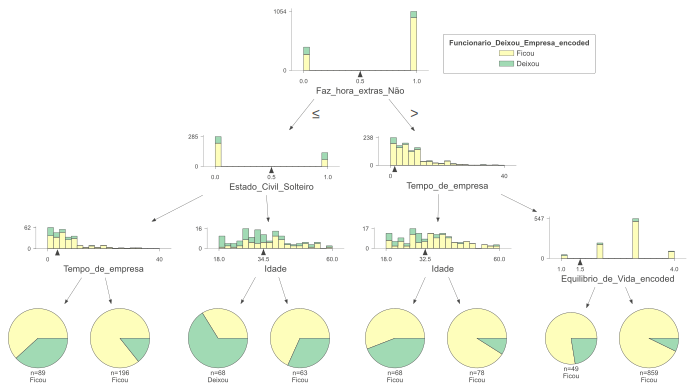

In [38]:
viz.view()

### Avaliação do modelo treinado

#### Interpretação do Modelo

#### Desempenho do Modelo

In [30]:
round(accuracy_score(y, emp_model.predict(x)),2)

0.85